In [5]:
import os
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
os.listdir('raw_data')

['Lisbon_Dataset_FINAL_v24052022.xlsx',
 'TURIN_Dataset-final_anonym_corrected_feb2022.xlsx']

# Pre-Processing 1st Sheet

In [7]:
data_lisbona = pd.read_excel('raw_data/Lisbon_Dataset_FINAL_v24052022.xlsx')
data_lisbona.head()

,REF,OWD (0-no; 1-yes),Birth_year,Age_onset (years),Gender (1-male; 2-female),Ethnicity(1-cau; 2-afr; 3-asi),DateOf1stSymptoms,DateOfDiagnosis,Date Of Last visit or Death,Status (death-1; alive-2),...,Stroke (0-no; 1-yes),Cardiac disease (0-no; 1-yes),Primary cancer (0-no; 1-yes),Major Trauma before onset (0-no; 1-yes),Surgical interventions before onset (0-no; 1-yes),SOD1 Mutation,"C9orf72 repeat-primed PCR result (Yes=expansion, No=normal)",TARDBP mutation,FUS mutation,ZipCode
0,2,0,1951.0,54.92,1,1.0,2006-06-01,2006-11-07,2007-12-03 00:00:00,2.0,...,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN,2695-395
1,3,0,1927.0,72.64,1,1.0,1999-09-01,2000-01-14,2000-06-13 00:00:00,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2460-197
2,4,0,1941.0,64.59,1,1.0,2006-04-01,2006-12-27,2007-10-09 00:00:00,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3720-319
3,5,0,1940.0,65.55,2,1.0,2005-12-01,2006-05-25,2007-01-29 00:00:00,1.0,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2525-811
4,6,1,1935.0,61.94,1,1.0,1997-06-01,1999-10-01,2000-09-26 00:00:00,1.0,...,0.0,0.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,1675-163


In [8]:
data_lisbona.columns

Index(['REF', 'OWD (0-no; 1-yes)', 'Birth_year', 'Age_onset (years)',
       'Gender (1-male; 2-female)', 'Ethnicity(1-cau; 2-afr; 3-asi)',
       'DateOf1stSymptoms', 'DateOfDiagnosis', 'Date Of Last visit or Death',
       'Status (death-1; alive-2)', 'NIV (0-no; 1-yes)', 'Date_NIV',
       'Tracheostomy (0-no; 1-yes)', 'Date_tracheostomy', 'PEG (0-no; 1-yes)',
       'Date_PEG', 'UMNvsLMN predominance(1-UMN; 2-LMN; 3- both; NA)',
       'Onset (1- Limbs; 2- Bulbar; 3- Axial/Resp; 4- Generalized)',
       'Limb_O ULvsLL  (0-not related; 1-UL; 2- LL; 3-both; 999-not available)',
       'Limbs Predominant Impairment (0-not related; 1-distal; 2-proximal; 3- both; 999-not available)',
       'Limbs Predominant Side (0-not related;1-left, 2-right; 3-both; 999-not available)',
       'Height (m)', 'Weight before 1st symptoms (kg)',
       'Weight at 1st visit (kg)', 'Weightloss >10% (0-no; 1-yes)',
       'ALS familiar history (0-no; 1-yes)', 'Main occupation',
       'Retired at the diagn

<Axes: >

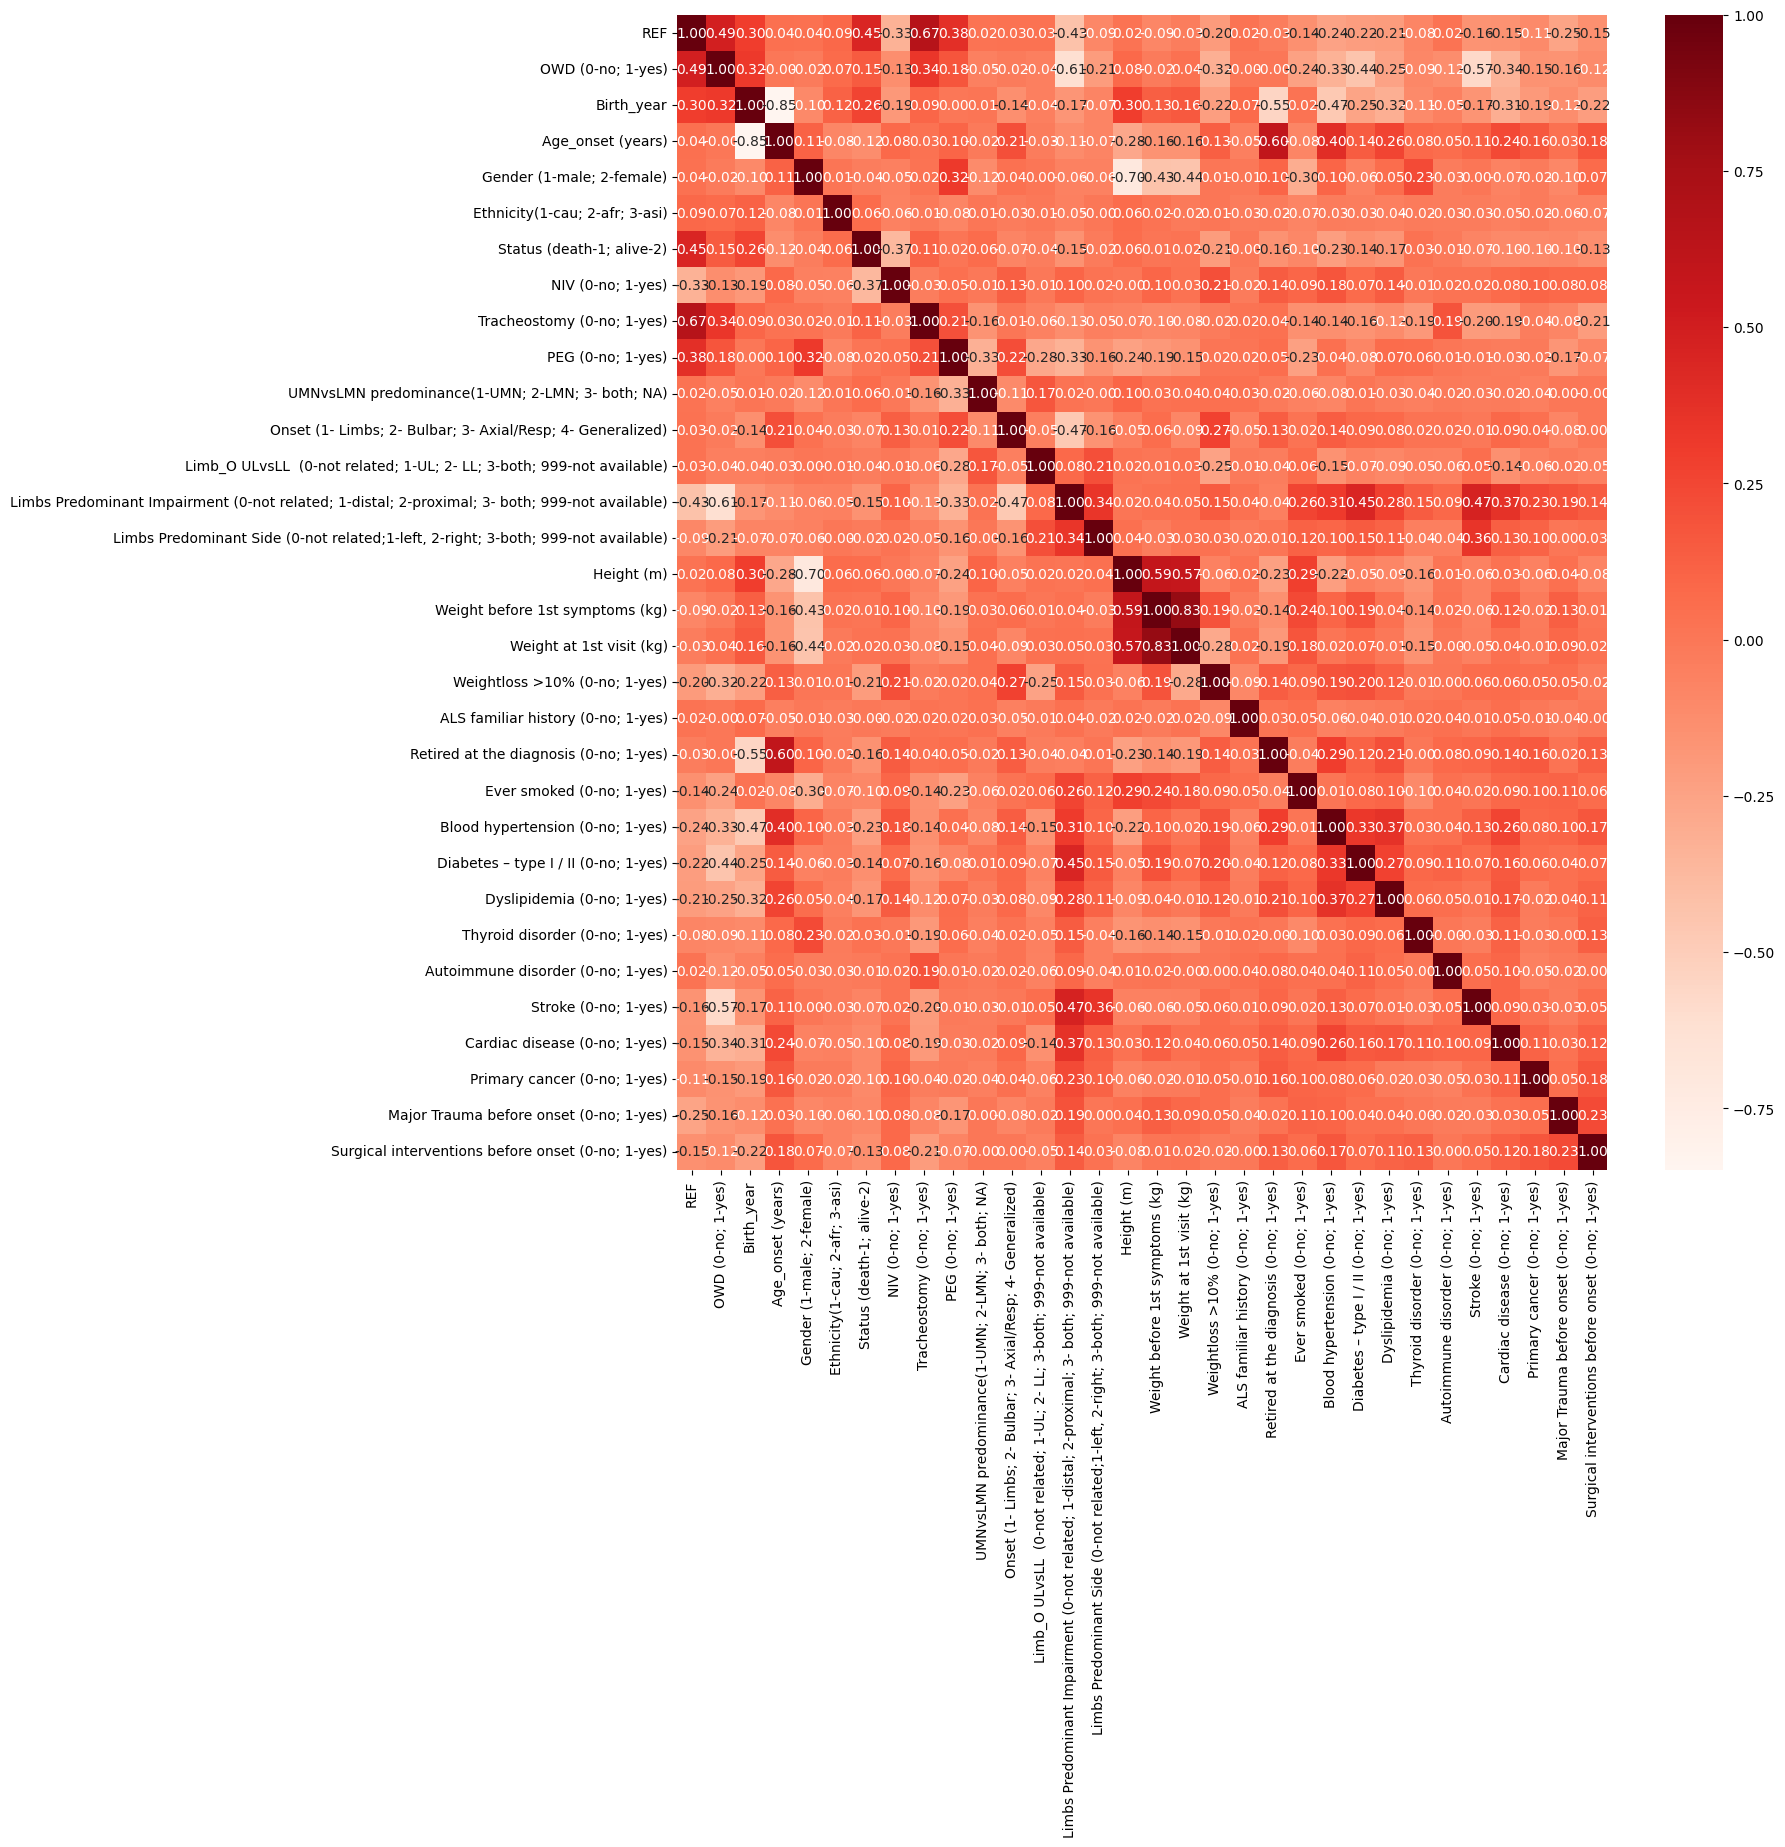

In [9]:
plt.figure(figsize=(15,15))
cor = data_lisbona.corr(numeric_only = "False")
seaborn.heatmap(cor, annot=True, cmap=plt.cm.Reds, fmt='.2f')

In [10]:
#Convert to DateTime some columns
data_lisbona['DateOf1stSymptoms'] = pd.to_datetime(data_lisbona['DateOf1stSymptoms'])
data_lisbona['DateOfDiagnosis'] = pd.to_datetime(data_lisbona['DateOfDiagnosis'])
data_lisbona['Date Of Last visit or Death'] = pd.to_datetime(data_lisbona['Date Of Last visit or Death'])

data_lisbona['Date_NIV'] = pd.to_datetime(data_lisbona['Date_NIV'])
data_lisbona['Date_tracheostomy'] = pd.to_datetime(data_lisbona['Date_tracheostomy'])
data_lisbona['Date_PEG'] = pd.to_datetime(data_lisbona['Date_PEG'])

In [11]:
#Create new columns
data_lisbona['WaitingTime'] = (data_lisbona['DateOf1stSymptoms'] - data_lisbona['DateOfDiagnosis']) / pd.Timedelta(days=1)
data_lisbona['DateToDeathFromDiagnosis'] = (data_lisbona['Date Of Last visit or Death'] - data_lisbona['DateOfDiagnosis']) / pd.Timedelta(days=1)

data_lisbona['Weight before 1st symptoms (kg)'] = pd.to_numeric(data_lisbona['Weight before 1st symptoms (kg)'], errors='coerce')
data_lisbona['Weight at 1st visit (kg)'] = pd.to_numeric(data_lisbona['Weight at 1st visit (kg)'], errors='coerce')

data_lisbona['WeightRelathion'] = (data_lisbona['Weight at 1st visit (kg)'] - data_lisbona['Weight before 1st symptoms (kg)']) / data_lisbona['Weight at 1st visit (kg)']

In [12]:
to_drop = ['OWD (0-no; 1-yes)', 'DateOf1stSymptoms', 'Birth_year',
           'Ethnicity(1-cau; 2-afr; 3-asi)',
           'Main occupation', 'Retired at the diagnosis (0-no; 1-yes)', 
           'Weight before 1st symptoms (kg)', 
           'Major Trauma before onset (0-no; 1-yes)', 'Surgical interventions before onset (0-no; 1-yes)', 
           'ZipCode']

data_lisbona.drop(to_drop, 
                 axis=1, inplace=True)

data_lisbona['C9orf72 repeat-primed PCR result (Yes=expansion, No=normal)'] = data_lisbona['C9orf72 repeat-primed PCR result (Yes=expansion, No=normal)'].replace(['No', 'no', 'yes', 'Yes', '', ' '], [0, 0, 1, 1, np.nan, np.nan])

In [13]:
data_lisbona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1632 entries, 0 to 1631
Data columns (total 37 columns):
 #   Column                                                                                          Non-Null Count  Dtype         
---  ------                                                                                          --------------  -----         
 0   REF                                                                                             1632 non-null   int64         
 1   Age_onset (years)                                                                               1614 non-null   float64       
 2   Gender (1-male; 2-female)                                                                       1632 non-null   int64         
 3   DateOfDiagnosis                                                                                 1604 non-null   datetime64[ns]
 4   Date Of Last visit or Death                                                                     

In [14]:
data_lisbona.set_index('REF', drop=True, inplace=True)

In [15]:
data_lisbona.rename(columns={"Gender (1-male; 2-female)":"Gender",
                            "Ethnicity(1-cau; 2-afr; 3-asi)":"Ethnicity",
                            "Status (death-1; alive-2)":"Status",
                            "NIV (0-no; 1-yes)":"NIV", 
                            "Tracheostomy (0-no; 1-yes)":"Tracheostomy",
                            "PEG (0-no; 1-yes)":"PEG",
                            "Onset (1- Limbs; 2- Bulbar; 3- Axial/Resp; 4- Generalized)":"Onset",
                            "Limbs Predominant Side (0-not related;1-left, 2-right; 3-both; 999-not available)":"Side", 
                            "UMNvsLMN predominance(1-UMN; 2-LMN; 3- both; NA)":"UMNvsLMN",
                            "ALS familiar history (0-no; 1-yes)":"ALS familiar history", 
                            "Ever smoked (0-no; 1-yes)":"smoke", 
                            "Blood hypertension (0-no; 1-yes)":"Blood hypertension", 
                            "Diabetes – type I / II (0-no; 1-yes)":"Diabetes – type I / II",
                            "Dyslipidemia (0-no; 1-yes)":"Dyslipidemia",
                            "Limb_O ULvsLL  (0-not related; 1-UL; 2- LL; 3-both; 999-not available)":"ULvsLL",
                            "Limbs Predominant Impairment (0-not related; 1-distal; 2-proximal; 3- both; 999-not available)":"DistProx",
                            "Thyroid disorder (0-no; 1-yes)":"Thyroid disorder",
                            "Autoimmune disorder (0-no; 1-yes)":"Autoimmune disorder",
                            "C9orf72 repeat-primed PCR result (Yes=expansion, No=normal)":"C9orf72 repeat-primed PCR result",
                            "Stroke (0-no; 1-yes)":"Stroke",
                            "Cardiac disease (0-no; 1-yes)":"Cardiac disease",
                            "Primary cancer (0-no; 1-yes)":"Primary cancer"}, inplace=True)

In [16]:
print(f"Dati di pazienti deceduti: {len(data_lisbona[data_lisbona['Status'] == 1])} \nDati di pazienti vivi: {len(data_lisbona[data_lisbona['Status'] == 2])}")

Dati di pazienti deceduti: 1031 
Dati di pazienti vivi: 598


## Feature Engineering

In [17]:
if 'UMNvsLMN' in data_lisbona.columns or 'Side' in data_lisbona.columns or 'Onset' in data_lisbona.columns or 'DistProx' in data_lisbona.columns or 'ULvsLL' in data_lisbona.columns:
    data_lisbona[['UMNvsLMN', 'Onset', 'Side',
       'DistProx', 'ULvsLL']].value_counts()

In [18]:
if 'UMNvsLMN' in data_lisbona.columns or 'Side' in data_lisbona.columns or 'Onset' in data_lisbona.columns or 'DistProx' in data_lisbona.columns or 'ULvsLL' in data_lisbona.columns:
    data_lisbona['UMNvsLMN']=data_lisbona['UMNvsLMN'].replace(['', 999.0], ['NA', 'NA'])
    data_lisbona['Onset']=data_lisbona['Onset'].replace(['', 999], ['NA', 'NA'])
    data_lisbona['Side']=data_lisbona['Side'].replace(['', 999], ['NA', 'NA'])
    data_lisbona['DistProx']=data_lisbona['DistProx'].replace(['', 999], ['NA', 'NA'])
    data_lisbona['ULvsLL']=data_lisbona['ULvsLL'].replace(['', 999], ['NA', 'NA'])

In [19]:
data_lisbona[['Blood hypertension', 'Diabetes – type I / II', 'Dyslipidemia', 'Thyroid disorder', 'Autoimmune disorder', 'Stroke', 'Cardiac disease', 'Primary cancer']][data_lisbona[['Blood hypertension', 'Diabetes – type I / II', 'Dyslipidemia', 'Thyroid disorder', 'Autoimmune disorder', 'Stroke', 'Cardiac disease', 'Primary cancer']].isna().any(axis=1)]

,Blood hypertension,Diabetes – type I / II,Dyslipidemia,Thyroid disorder,Autoimmune disorder,Stroke,Cardiac disease,Primary cancer
REF,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1725,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
1726,1.0,1.0,1.0,1.0,1.0,NaN,0.0,0.0
1727,1.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0


In [20]:
for index, row in data_lisbona[['Blood hypertension', 'Diabetes – type I / II', 'Dyslipidemia', 'Thyroid disorder', 'Autoimmune disorder', 'Stroke', 'Cardiac disease', 'Primary cancer']].iterrows():
    if row.isnull().values.any() and np.nansum(row.values) >= 1:
        data_lisbona.loc[index,['Blood hypertension', 'Diabetes – type I / II', 'Dyslipidemia', 'Thyroid disorder', 'Autoimmune disorder', 'Stroke', 'Cardiac disease', 'Primary cancer']] = [0 if np.isnan(item) or item == ' ' else item for item in row.values]
        
data_lisbona[['smoke', 'Blood hypertension', 'Diabetes – type I / II', 'Dyslipidemia', 'Thyroid disorder', 'Autoimmune disorder', 'Stroke', 'Cardiac disease', 'Primary cancer', 'C9orf72 repeat-primed PCR result']]=data_lisbona[['smoke', 'Blood hypertension', 'Diabetes – type I / II', 'Dyslipidemia', 'Thyroid disorder', 'Autoimmune disorder', 'Stroke', 'Cardiac disease', 'Primary cancer', 'C9orf72 repeat-primed PCR result']].replace({'':0, ' ':0, '_':0})

In [21]:
print(data_lisbona['SOD1 Mutation '].unique())
data_lisbona['SOD1 Mutation '].replace(['No', 'Asp90Ala (Homozygous)', 'G16S (GGC>AGC) Heterozygous ',
                                        'c.72+19G>A', 'No ', 'p.Ala152Pro (GCC>CCC).', 
                                        'no', 'Ala140Ala','Ter154SerextTer6', 'NO', 
                                        'c.281G>T (p.(Gly94Val)) '], [0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1], 
                                       inplace=True)
print(data_lisbona['TARDBP mutation'].unique())
data_lisbona['TARDBP mutation'].replace(['No', 'No ', 'Ile383Val ', 'c.1144G>C, p.(Ala382Thr) ', 
                                  'c.1144G>A, p.(Ala382Thr)', 
                                  'c.1154G>T, p.(TRP385Leu)'], [0, 0, 1, 1, 1, 1], 
                                        inplace=True)
print(data_lisbona['FUS mutation'].unique())
data_lisbona['FUS mutation'].replace(['No', 'c.1317T>C , heterozygous', 'c.1551G>C',
                                      'c.1292C>T, p.(Pro431Leu)', 
                                      'c.1549C>G, p.(His517Asp)'], [0, 1, 1, 1, 1], 
                                     inplace=True)
print('Done')

[nan 'No' 'Asp90Ala (Homozygous)' 'G16S (GGC>AGC) Heterozygous '
 'c.72+19G>A' 'No ' 'p.Ala152Pro (GCC>CCC).' 'no' 'Ala140Ala'
 'Ter154SerextTer6' 'NO' 'c.281G>T (p.(Gly94Val)) ']
[nan 'No' 'No ' 'Ile383Val ' 'c.1144G>C, p.(Ala382Thr) '
 'c.1144G>A, p.(Ala382Thr)' 'c.1154G>T, p.(TRP385Leu)']
[nan 'No' 'c.1317T>C , heterozygous' 'c.1551G>C'
 'c.1292C>T, p.(Pro431Leu)' 'c.1549C>G, p.(His517Asp)']
Done


# Pre-Processing 2nd Sheet

In [22]:
data_lisbona_survey = pd.read_excel('raw_data/Lisbon_Dataset_FINAL_v24052022.xlsx', sheet_name=2, na_values='n')

In [23]:
data_lisbona_survey_processed = data_lisbona_survey.iloc[:,0:19]

data_lisbona_survey_processed.drop(columns=['ALS-FRS1 (sum 1+2+3+4+5+6+7+8+9+old10)',
                                            'ALS-FRS-R1 (sum 1+2+3+4+5+6+7+8+9+10+11+12)',
                                            'ALS-FRSb1 (sum 1+2+3)','R1 (sum 10+11+12)', 
                                            'old10'
                                           ], 
                                     inplace=True)

data_lisbona_survey_processed.rename(columns={
                                        1:'ALSFRS_1', 
                                        2:'ALSFRS_2', 
                                        3:'ALSFRS_3', 
                                        4:'ALSFRS_4', 
                                        5:'ALSFRS_5',
                                        6:'ALSFRS_6', 
                                        7:'ALSFRS_7', 
                                        8:'ALSFRS_8', 
                                        9:'ALSFRS_9', 
                                        10:'ALSFRS_10', 
                                        11:'ALSFRS_11', 
                                        12:'ALSFRS_12'}, 
                                     inplace=True)

date_column = {}

for index, column in enumerate(data_lisbona_survey.columns):
    if isinstance(column, str) and 'Date' in column:
        date_column[index] = column

In [24]:
i = 2

for index, column in date_column.items():
    if index == 1 or index == 523:
        pass
    else:
        data_temp = pd.concat([data_lisbona_survey['REF'], data_lisbona_survey.iloc[:,index:index+18]], axis=1)
        data_temp.columns = data_temp.columns.str.replace(' ', '')
        
        #Drop column
        data_temp.drop(columns=[f'ALS-FRS{i}', 
                                f'ALS-FRS-R{i}', 
                                f'ALS-FRSb{i}', 
                                f'R{i}',
                                f'old10.{i-1}'],
                       inplace=True)
        
        #Drop na rows
        data_temp.dropna(inplace=True)
        
        #Rename columns
        data_temp.rename(columns={f'Date{i}': 'Date1',
                                  f'1.{i-1}':'ALSFRS_1', 
                                  f'2.{i-1}':'ALSFRS_2', 
                                  f'3.{i-1}':'ALSFRS_3', 
                                  f'4.{i-1}':'ALSFRS_4', 
                                  f'5.{i-1}':'ALSFRS_5',
                                  f'6.{i-1}':'ALSFRS_6', 
                                  f'7.{i-1}':'ALSFRS_7', 
                                  f'8.{i-1}':'ALSFRS_8', 
                                  f'9.{i-1}':'ALSFRS_9', 
                                  f'10.{i-1}':'ALSFRS_10', 
                                  f'11.{i-1}':'ALSFRS_11', 
                                  f'12.{i-1}':'ALSFRS_12'}, 
                         inplace=True)
        i += 1
        
        data_lisbona_survey_processed = pd.concat([data_lisbona_survey_processed, data_temp], 
                                                  axis=0, ignore_index=True)
        

In [25]:
data_lisbona_survey_processed.set_index('REF', drop=True, inplace=True)

In [26]:
data_lisbona_survey_processed['Date1'] = pd.to_datetime(data_lisbona_survey_processed['Date1'])

In [27]:
data_lisbona_survey_processed.dropna(thresh=12, inplace=True)

In [28]:
data_lisbona_survey_processed = data_lisbona_survey_processed.join(data_lisbona[['DateOfDiagnosis']])
data_lisbona_survey_processed.head()

,Date1,ALSFRS_1,ALSFRS_2,ALSFRS_3,ALSFRS_4,ALSFRS_5,ALSFRS_6,ALSFRS_7,ALSFRS_8,ALSFRS_9,ALSFRS_10,ALSFRS_11,ALSFRS_12,DateOfDiagnosis
REF,,,,,,,,,,,,,,
2,2006-11-07,4.0,4.0,4.0,4,4,3,3,2.0,2.0,4,4.0,4.0,2006-11-07
2,2006-12-04,4.0,4.0,4.0,4.0,4.0,3.0,3.0,2.0,2.0,4.0,4.0,4.0,2006-11-07
2,2007-01-09,4.0,4.0,4.0,4.0,4.0,3.0,3.0,2.0,1.0,4.0,4.0,4.0,2006-11-07
2,2007-05-17,4.0,4.0,4.0,3.0,2.0,2.0,2.0,2.0,1.0,4.0,4.0,4.0,2006-11-07
2,2007-09-03,3.0,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,4.0,2006-11-07


In [29]:
data_lisbona_survey_processed['SurveyFromDiagnosis'] = (data_lisbona_survey_processed['Date1'] - data_lisbona_survey_processed['DateOfDiagnosis']) / pd.Timedelta(days=1)

In [30]:
data_lisbona_survey_processed_min_survey = data_lisbona_survey_processed.reset_index().groupby('REF')['SurveyFromDiagnosis'].min()
data_lisbona_survey_processed_min_survey[data_lisbona_survey_processed_min_survey < 15 ].sort_values()

REF
293    -150.0
396    -123.0
1647   -120.0
1409    -92.0
325     -80.0
        ...  
1480     14.0
1486     14.0
69       14.0
1325     14.0
845      14.0
Name: SurveyFromDiagnosis, Length: 651, dtype: float64

In [31]:
to_drop = ['DateOfDiagnosis']

data_lisbona_survey_processed.drop(to_drop, 
                 axis=1, inplace=True)

# Pre-Processing 3rd Sheet

In [32]:
data_lisbona_fvc = pd.read_excel('raw_data/Lisbon_Dataset_FINAL_v24052022.xlsx', sheet_name=1)
data_lisbona_fvc.head()

,REF,Date1,%FVC1,Weight (BMI),Date2,%FVC2,Weight (BMI).1,Date3,%FVC3,Weight (BMI).2,...,Weight (BMI).11,Date 13,%FVC13,Weight (BMI).12,Date 14,%FVC14,Weight (BMI).13,Date 15,%FVC15,Weight (BMI).14
0,2,2006-11-15 00:00:00,88.32,NaN,2007-01-24,83.43,NaN,2007-05-11,56.2,NaN,...,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
1,3,1999-12-15 00:00:00,69.90,68,NaT,NaN,NaN,NaT,NaN,NaN,...,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
2,4,2006-07-31 00:00:00,110.00,54,NaT,NaN,NaN,NaT,NaN,NaN,...,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
3,5,2006-06-07 00:00:00,79.99,53,NaT,NaN,NaN,NaT,NaN,NaN,...,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
4,6,1999-10-13 00:00:00,95.60,78,2000-01-05,81.90,78,NaT,NaN,NaN,...,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [33]:
data_lisbona_fvc_processed = data_lisbona_fvc.iloc[:,0:4]

data_lisbona_fvc_processed.drop(columns=[
                                            'Weight (BMI)'
                                           ], 
                                     inplace=True)

date_column = {}

for index, column in enumerate(data_lisbona_fvc.columns):
    if isinstance(column, str) and 'Date' in column:
        date_column[index] = column

In [34]:
i = 2

for index, column in date_column.items():
    if index == 1 or index == 43:
        pass
    else:
        data_temp = pd.concat([data_lisbona_fvc['REF'], data_lisbona_fvc.iloc[:,index:index+3]], axis=1)
        data_temp.columns = data_temp.columns.str.replace(' ', '')
                
        #Drop column
        data_temp.drop(columns=[f'Weight(BMI).{i-1}'],
                       inplace=True)
        
        #Drop na rows
        data_temp.dropna(inplace=True)
        
        #Rename columns
        data_temp.rename(columns={f'Date{i}': 'Date1',
                                  f'%FVC{i}': '%FVC1 '}, 
                         inplace=True)
        
        i += 1
        
        data_lisbona_fvc_processed = pd.concat([data_lisbona_fvc_processed, data_temp], 
                                                  axis=0, ignore_index=True)

In [35]:
data_lisbona_fvc_processed.set_index('REF', drop=True, inplace=True)

In [36]:
data_lisbona_fvc_processed['Date1'].replace(['not done', 'Not done', 'Not Done', 'Não'], 
                                            [np.nan, np.nan, np.nan, np.nan], inplace=True)

In [37]:
data_lisbona_fvc_processed.dropna(subset=['Date1'], inplace=True)

In [38]:
data_lisbona_fvc_processed['Date1'] = pd.to_datetime(data_lisbona_fvc_processed['Date1'], format= '%Y-%m-%d %H:%M:%S')

In [39]:
data_lisbona_fvc_processed = data_lisbona_fvc_processed.join(data_lisbona[['DateOfDiagnosis']])

In [40]:
data_lisbona_fvc_processed['FVCFromDiagnosis'] = (data_lisbona_fvc_processed['Date1'] - data_lisbona_fvc_processed['DateOfDiagnosis']) / pd.Timedelta(days=1)

In [41]:
data_lisbona_fvc_processed.head()

,Date1,%FVC1,DateOfDiagnosis,FVCFromDiagnosis
REF,,,,
2,2006-11-15,88.32,2006-11-07,8.0
2,2007-01-24,83.43,2006-11-07,78.0
2,2007-05-11,56.20,2006-11-07,185.0
3,1999-12-15,69.90,2000-01-14,-30.0
4,2006-07-31,110.00,2006-12-27,-149.0


# Check censored between 1st, 2nd and 3rd Sheets

In [42]:
data_lisbona_min_survey = data_lisbona_survey_processed.reset_index().groupby('REF')['SurveyFromDiagnosis'].min()
data_lisbona_min_survey[data_lisbona_min_survey < -15].sort_values()

REF
293    -150.0
396    -123.0
1647   -120.0
1409    -92.0
325     -80.0
608     -78.0
180     -71.0
22      -69.0
412     -61.0
499     -58.0
276     -57.0
56      -55.0
160     -54.0
265     -53.0
439     -52.0
184     -50.0
99      -46.0
576     -45.0
1620    -39.0
370     -39.0
226     -38.0
481     -37.0
259     -32.0
456     -31.0
1303    -30.0
168     -29.0
899     -28.0
41      -28.0
74      -26.0
62      -22.0
1052    -21.0
Name: SurveyFromDiagnosis, dtype: float64

In [43]:
data_lisbona['Date Of Last visit or Death'].isnull().sum()

3

In [44]:
def check_if_list(to_be_analyzed):
    if isinstance(to_be_analyzed, pd.Series) and len(to_be_analyzed) > 1:
        date = max(to_be_analyzed)
    else:
        date = to_be_analyzed
    return date

for index in data_lisbona.index:
    dates = []
    
    if pd.isna(data_lisbona.at[index, 'Date Of Last visit or Death']) and (index in data_lisbona_survey_processed.index) and (index in data_lisbona_fvc_processed.index):
        date_survey = check_if_list(data_lisbona_survey_processed.at[index, 'Date1'])
        date_fvc = check_if_list(data_lisbona_fvc_processed.at[index, 'Date1'])
        dates = [data_lisbona.at[index, 'Date_NIV'], data_lisbona.at[index, 'Date_tracheostomy'], 
                 data_lisbona.at[index, 'Date_PEG'], date_survey, 
                 date_fvc]
    elif pd.isna(data_lisbona.at[index, 'Date Of Last visit or Death']) and (index in data_lisbona_survey_processed.index):
        date_survey = check_if_list(data_lisbona_survey_processed.at[index, 'Date1'])
        dates = [data_lisbona.at[index, 'Date_NIV'], data_lisbona.at[index, 'Date_tracheostomy'], 
                 data_lisbona.at[index, 'Date_PEG'], date_survey]
    elif pd.isna(data_lisbona.at[index, 'Date Of Last visit or Death']) and (index in data_lisbona_fvc_processed.index):
        date_fvc = check_if_list(data_lisbona_fvc_processed.at[index, 'Date1'])
        dates = [data_lisbona.at[index, 'Date_NIV'], data_lisbona.at[index, 'Date_tracheostomy'], 
                 data_lisbona.at[index, 'Date_PEG'], date_fvc]
    elif pd.isna(data_lisbona.at[index, 'Date Of Last visit or Death']):
        dates = [data_lisbona.at[index, 'Date_NIV'], data_lisbona.at[index, 'Date_tracheostomy'], 
                 data_lisbona.at[index, 'Date_PEG']]
    else:
        pass
    
    if len(dates) != 0:
        data_lisbona.loc[index, 'Date Of Last visit or Death'] = pd.Series(dates).max()

In [45]:
for index in data_lisbona.index:
    dates = []
    
    if pd.isna(data_lisbona.at[index, 'Date_NIV']) and (index in data_lisbona_survey_processed.index) and (index in data_lisbona_fvc_processed.index):
        date_survey = check_if_list(data_lisbona_survey_processed.at[index, 'Date1'])
        date_fvc = check_if_list(data_lisbona_fvc_processed.at[index, 'Date1'])
        dates = [data_lisbona.at[index, 'Date Of Last visit or Death'], date_survey, date_fvc]
    elif pd.isna(data_lisbona.at[index, 'Date_NIV']) and (index in data_lisbona_survey_processed.index):
        date_survey = check_if_list(data_lisbona_survey_processed.at[index, 'Date1'])
        dates = [data_lisbona.at[index, 'Date Of Last visit or Death'], date_survey]
    elif pd.isna(data_lisbona.at[index, 'Date_NIV']) and (index in data_lisbona_fvc_processed.index):
        date_fvc = check_if_list(data_lisbona_fvc_processed.at[index, 'Date1'])
        dates = [data_lisbona.at[index, 'Date Of Last visit or Death'], date_fvc]
    elif pd.isna(data_lisbona.at[index, 'Date_NIV']):
        dates = [data_lisbona.at[index, 'Date Of Last visit or Death']]
    
    print(data_lisbona.at[index, 'Date_NIV'], dates)
    if len(dates) != 0:
        dates = [np.nan if isinstance(i, str) else i for i in dates]
        data_lisbona.loc[index, 'Date_NIV'] = pd.Series(dates).max()
        
    dates = []
    
    if pd.isna(data_lisbona.at[index, 'Date_PEG']) and (index in data_lisbona_survey_processed.index) and (index in data_lisbona_fvc_processed.index):
        date_survey = check_if_list(data_lisbona_survey_processed.at[index, 'Date1'])
        date_fvc = check_if_list(data_lisbona_fvc_processed.at[index, 'Date1'])
        dates = [data_lisbona.at[index, 'Date Of Last visit or Death'], date_survey, date_fvc]
    elif pd.isna(data_lisbona.at[index, 'Date_PEG']) and (index in data_lisbona_survey_processed.index):
        date_survey = check_if_list(data_lisbona_survey_processed.at[index, 'Date1'])
        dates = [data_lisbona.at[index, 'Date Of Last visit or Death'], date_survey]
    elif pd.isna(data_lisbona.at[index, 'Date_PEG']) and (index in data_lisbona_fvc_processed.index):
        date_fvc = check_if_list(data_lisbona_fvc_processed.at[index, 'Date1'])
        dates = [data_lisbona.at[index, 'Date Of Last visit or Death'], date_fvc]
    elif pd.isna(data_lisbona.at[index, 'Date_PEG']):
        dates = [data_lisbona.at[index, 'Date Of Last visit or Death']]
    
    if len(dates) != 0:
        dates = [np.nan if isinstance(i, str) else i for i in dates]
        data_lisbona.loc[index, 'Date_PEG'] = pd.Series(dates).max()

2007-06-04 00:00:00 []
2000-02-02 00:00:00 []
NaT [Timestamp('2007-10-09 00:00:00'), Timestamp('2007-02-02 00:00:00'), Timestamp('2006-07-31 00:00:00')]
NaT [Timestamp('2007-01-29 00:00:00'), Timestamp('2006-11-09 00:00:00'), Timestamp('2006-06-07 00:00:00')]
NaT [Timestamp('2000-09-26 00:00:00'), Timestamp('2000-01-05 00:00:00')]
NaT [Timestamp('2004-08-18 00:00:00'), Timestamp('2004-05-24 00:00:00'), Timestamp('2004-01-28 00:00:00')]
1999-11-01 00:00:00 []
2004-08-10 00:00:00 []
2007-08-20 00:00:00 []
2004-10-01 00:00:00 []
2006-05-18 00:00:00 []
1997-10-01 00:00:00 []
2002-05-01 00:00:00 []
2001-05-01 00:00:00 []
2006-07-31 00:00:00 []
2006-08-21 00:00:00 []
NaT [Timestamp('2007-06-07 00:00:00'), Timestamp('2006-06-26 00:00:00'), Timestamp('2005-05-31 00:00:00')]
NaT [Timestamp('2007-06-01 00:00:00')]
NaT [Timestamp('2007-12-20 00:00:00'), Timestamp('2006-07-17 00:00:00'), Timestamp('2006-01-17 00:00:00')]
NaT [Timestamp('2011-07-28 00:00:00'), Timestamp('2010-10-18 00:00:00'), Time

In [46]:
data_lisbona['Date Of Last visit or Death'].isnull().sum()

2

In [47]:
data_lisbona.dropna(subset=['Date Of Last visit or Death'], inplace=True)

In [48]:
data_lisbona['Date Of Last visit or Death'].isnull().sum()

0

In [49]:
data_lisbona['NIVFromDiagnosis'] = (data_lisbona['Date_NIV'] - data_lisbona['DateOfDiagnosis']) / pd.Timedelta(days=1)
data_lisbona['TracheostomyFromDiagnosis'] = (data_lisbona['Date_tracheostomy'] - data_lisbona['DateOfDiagnosis']) / pd.Timedelta(days=1)
data_lisbona['PEGFromDiagnosis'] = (data_lisbona['Date_PEG'] - data_lisbona['DateOfDiagnosis']) / pd.Timedelta(days=1)

to_drop = ['Date_tracheostomy', 'Tracheostomy', 'DateOfDiagnosis']

data_lisbona.drop(to_drop, 
                 axis=1, inplace=True)

# Save in Excel File

In [50]:
with pd.ExcelWriter('preprocessed_data/lisbona.xlsx') as writer:  
    data_lisbona.to_excel(writer, sheet_name='Static vars_corr')
    data_lisbona_survey_processed.to_excel(writer, sheet_name='ALSFRS-R')
    data_lisbona_fvc_processed.to_excel(writer, sheet_name='FVC')